# Figure 1: Emergence Curves — EB* and Behavioral Accuracy Across Model Scales

Plots attention binding (EB*) and behavioral accuracy across 8 training checkpoints for Pythia 160M, 1B, and 2.8B.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.family'] = 'DejaVu Sans'

df = pd.read_csv('../data/results/pilot_summary.csv')
df.head()

,model,checkpoint,step_k,rec_acc,gen_mean,beh_avg,eb_star_mean,eb_star_max,best_layer_mode,n_prompts
0,pythia-160m-deduped,step0,0,0.1667,0.0000,0.0833,0.1573,0.3065,6,12
1,pythia-160m-deduped,step15000,15,0.0000,0.3333,0.1667,0.6439,0.7170,3,12
2,pythia-160m-deduped,step30000,30,0.1667,0.6667,0.4167,0.6422,0.7804,3,12
3,pythia-160m-deduped,step60000,60,0.1667,0.5556,0.3611,0.6835,0.8560,1,12
4,pythia-160m-deduped,step90000,90,0.5000,0.5555,0.5278,0.7341,0.9064,11,12


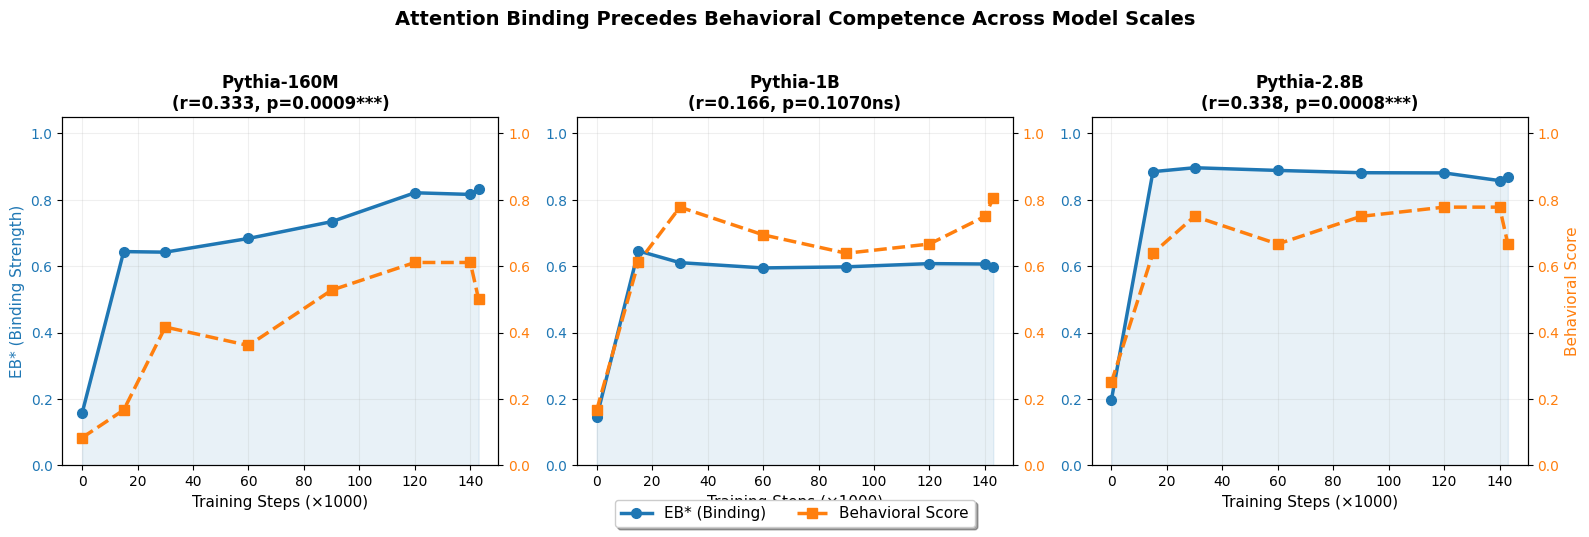

Saved to figures/figure1_emergence_curves.png


In [2]:
# Figure 1: Three-panel emergence curves
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

models = ['pythia-160m-deduped', 'pythia-1b-deduped', 'pythia-2.8b-deduped']
titles = ['Pythia-160M', 'Pythia-1B', 'Pythia-2.8B']
correlations = [0.333, 0.166, 0.338]
pvalues = [0.0009, 0.107, 0.0008]

color_eb = '#1f77b4'   # blue
color_beh = '#ff7f0e'  # orange

for idx, (model, title, r_val, p_val) in enumerate(zip(models, titles, correlations, pvalues)):
    ax1 = axes[idx]
    model_df = df[df['model'] == model].sort_values('step_k')
    x = model_df['step_k'].values

    # EB* on left y-axis
    line1, = ax1.plot(x, model_df['eb_star_mean'], 'o-', color=color_eb,
                      linewidth=2.5, markersize=7, label='EB* (binding)', zorder=3)
    ax1.fill_between(x, model_df['eb_star_mean'], alpha=0.1, color=color_eb)
    ax1.set_xlabel('Training Steps (×1000)', fontsize=11)
    if idx == 0:
        ax1.set_ylabel('EB* (Binding Strength)', color=color_eb, fontsize=11)
    ax1.tick_params(axis='y', labelcolor=color_eb)
    ax1.set_ylim(0, 1.05)

    # Behavior on right y-axis
    ax2 = ax1.twinx()
    line2, = ax2.plot(x, model_df['beh_avg'], 's--', color=color_beh,
                      linewidth=2.5, markersize=7, label='Behavioral Score', zorder=3)
    if idx == 2:
        ax2.set_ylabel('Behavioral Score', color=color_beh, fontsize=11)
    ax2.tick_params(axis='y', labelcolor=color_beh)
    ax2.set_ylim(0, 1.05)

    # Title with correlation
    sig = '***' if p_val < 0.001 else ('**' if p_val < 0.01 else ('*' if p_val < 0.05 else 'ns'))
    ax1.set_title(f'{title}\n(r={r_val:.3f}, p={p_val:.4f}{sig})',
                  fontsize=12, fontweight='bold')
    ax1.grid(True, alpha=0.2)

# Shared legend
fig.legend([line1, line2], ['EB* (Binding)', 'Behavioral Score'],
           loc='lower center', bbox_to_anchor=(0.5, -0.02), ncol=2, fontsize=11,
           frameon=True, fancybox=True, shadow=True)

plt.suptitle('Attention Binding Precedes Behavioral Competence Across Model Scales',
             fontsize=14, fontweight='bold', y=1.03)
plt.tight_layout()
plt.savefig('../figures/figure1_emergence_curves.png', dpi=300, bbox_inches='tight')
plt.savefig('../figures/figure1_emergence_curves.pdf', bbox_inches='tight')
plt.show()
print('Saved to figures/figure1_emergence_curves.png')

# Figure 4: 1B Binding-Behavior Decoupling

The 1B model develops attention binding structure early (step15k) but behavioral competence continues improving long after binding plateaus.

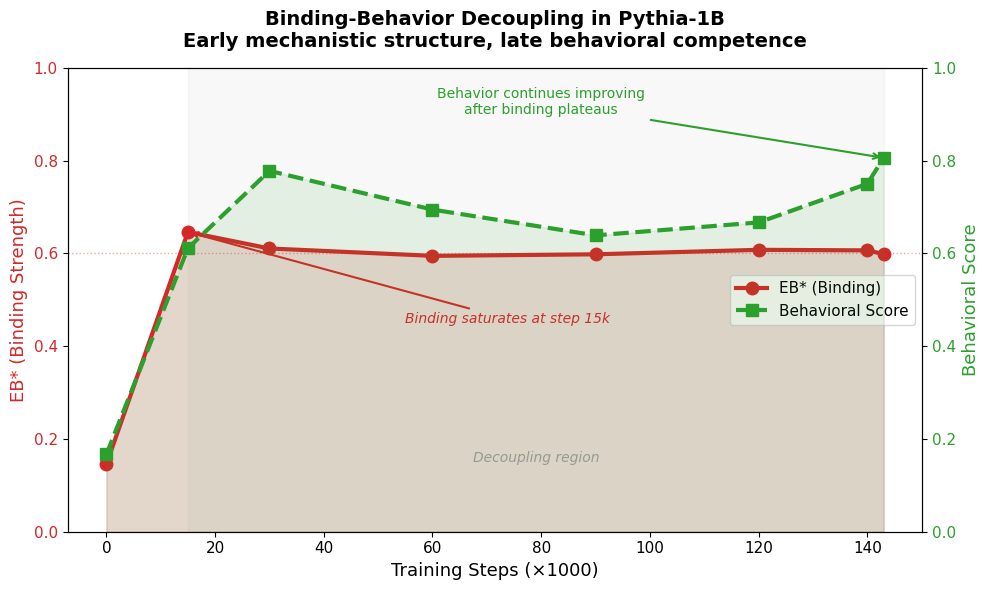

Saved to figures/figure4_1b_decoupling.png


In [3]:
# Figure 4: 1B decoupling effect
df_1b = df[df['model'] == 'pythia-1b-deduped'].sort_values('step_k')

fig, ax1 = plt.subplots(figsize=(10, 6))

x = df_1b['step_k'].values

# EB* on left axis
color_eb = '#d62728'
ax1.fill_between(x, df_1b['eb_star_mean'], alpha=0.15, color=color_eb)
line1, = ax1.plot(x, df_1b['eb_star_mean'], 'o-', color=color_eb,
                  linewidth=3, markersize=9, label='EB* (binding)')
ax1.set_xlabel('Training Steps (×1000)', fontsize=13)
ax1.set_ylabel('EB* (Binding Strength)', color=color_eb, fontsize=13)
ax1.tick_params(axis='y', labelcolor=color_eb, labelsize=11)
ax1.tick_params(axis='x', labelsize=11)
ax1.set_ylim(0, 1.0)

# Saturation line
ax1.axhline(y=0.6, color=color_eb, linestyle=':', alpha=0.4, linewidth=1)
ax1.annotate('Binding saturates at step 15k',
             xy=(15, 0.646), xytext=(55, 0.45),
             fontsize=10, color=color_eb, style='italic',
             arrowprops=dict(arrowstyle='->', color=color_eb, lw=1.5))

# Behavior on right axis
ax2 = ax1.twinx()
color_beh = '#2ca02c'
ax2.fill_between(x, df_1b['beh_avg'], alpha=0.1, color=color_beh)
line2, = ax2.plot(x, df_1b['beh_avg'], 's--', color=color_beh,
                  linewidth=3, markersize=9, label='Behavioral Score')
ax2.set_ylabel('Behavioral Score', color=color_beh, fontsize=13)
ax2.tick_params(axis='y', labelcolor=color_beh, labelsize=11)
ax2.set_ylim(0, 1.0)

# Behavior continues annotation
ax2.annotate('Behavior continues improving\nafter binding plateaus',
             xy=(143, 0.806), xytext=(80, 0.9),
             fontsize=10, ha='center', color=color_beh,
             arrowprops=dict(arrowstyle='->', color=color_beh, lw=1.5))

# Shaded divergence region
ax1.axvspan(15, 143, alpha=0.05, color='gray')
ax1.text(79, 0.15, 'Decoupling region', fontsize=10, ha='center',
         color='gray', style='italic', alpha=0.7)

plt.title('Binding-Behavior Decoupling in Pythia-1B\n'
          'Early mechanistic structure, late behavioral competence',
          fontsize=14, fontweight='bold', pad=15)

# Combined legend
ax1.legend([line1, line2], ['EB* (Binding)', 'Behavioral Score'],
           loc='center right', fontsize=11, frameon=True, fancybox=True)

plt.tight_layout()
plt.savefig('../figures/figure4_1b_decoupling.png', dpi=300, bbox_inches='tight')
plt.savefig('../figures/figure4_1b_decoupling.pdf', bbox_inches='tight')
plt.show()
print('Saved to figures/figure4_1b_decoupling.png')

# Summary Table: Cross-Model Comparison

In [4]:
# Summary table
print('=' * 85)
print(f'{"Model":>20s}  {"Step":>8s}  {"RecAcc":>7s}  {"GenMean":>8s}  {"BehAvg":>7s}  {"EB*mean":>8s}  {"BestL":>5s}')
print('-' * 85)
for _, row in df.sort_values(['model', 'step_k']).iterrows():
    print(f'{row["model"]:>20s}  {row["checkpoint"]:>8s}  {row["rec_acc"]:>7.1%}  '
          f'{row["gen_mean"]:>8.4f}  {row["beh_avg"]:>7.4f}  {row["eb_star_mean"]:>8.4f}  '
          f'L{row["best_layer_mode"]:>3d}')
print('=' * 85)

               Model      Step   RecAcc   GenMean   BehAvg   EB*mean  BestL
-------------------------------------------------------------------------------------
 pythia-160m-deduped     step0    16.7%    0.0000   0.0833    0.1573  L  6
 pythia-160m-deduped  step15000     0.0%    0.3333   0.1667    0.6439  L  3
 pythia-160m-deduped  step30000    16.7%    0.6667   0.4167    0.6422  L  3
 pythia-160m-deduped  step60000    16.7%    0.5556   0.3611    0.6835  L  1
 pythia-160m-deduped  step90000    50.0%    0.5555   0.5278    0.7341  L 11
 pythia-160m-deduped  step120000    66.7%    0.5555   0.6111    0.8211  L  8
 pythia-160m-deduped  step140000    66.7%    0.5555   0.6111    0.8161  L  3
 pythia-160m-deduped  step143000    50.0%    0.5000   0.5000    0.8313  L  3
   pythia-1b-deduped     step0    33.3%    0.0000   0.1667    0.1455  L  1
   pythia-1b-deduped  step15000    66.7%    0.5555   0.6111    0.6461  L  3
   pythia-1b-deduped  step30000    83.3%    0.7222   0.7778    0.6106  L  3
 